In [60]:
#Import data and read Files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import math
import pickle
grades=pd.read_csv("data/midterm.csv")
Discussions=pd.read_pickle("Discussions.pkl")
Comments=pd.read_pickle("Comments.pkl")
PostViewCount=pd.read_pickle("views.pkl")
StudentsStatus=pd.read_csv("data/allStudentsStatus.csv")
CountedActivity=pd.read_csv("data/CountedActivity.csv")
BadgeGroup=pd.read_csv("data/ChosenList.csv")
ControlGroup=pd.read_csv("data/NotChosenStudentsWithId.csv")
StudentsStatus=StudentsStatus.fillna(0)

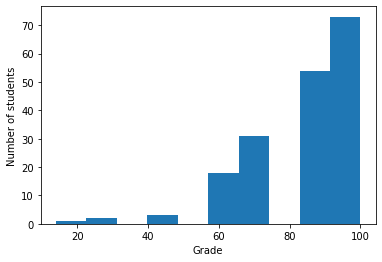

In [2]:
#GradesHistogram
plt.hist(grades["grade"])
plt.xlabel("Grade")
plt.ylabel("Number of students")
plt.savefig("graphs/GradeHistogram.png")
plt.show()

This is a simple midterm so the analysis is limited, but we can focus on four groups: 7/7,6/7,5/7,4/7,
mostly as a preperation for after analyzing finale exam

In [26]:
Grade7=grades.loc[grades["grade"]==100,"ID"]
Grade6=grades.loc[grades["grade"]==86,"ID"]
Grade5=grades.loc[grades["grade"]==71,"ID"]
Grade4=grades.loc[grades["grade"]==57,"ID"]

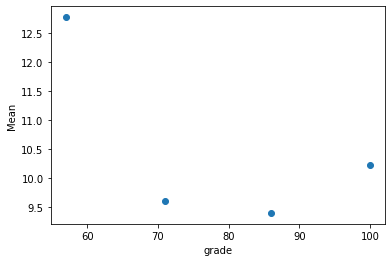

In [45]:
Means=np.array([np.mean(StudentsStatus.loc[StudentsStatus["id"].isin(Grade4),"Total"]),np.mean(StudentsStatus.loc[StudentsStatus["id"].isin(Grade5),"Total"]),np.mean(StudentsStatus.loc[StudentsStatus["id"].isin(Grade6),"Total"]),np.mean(StudentsStatus.loc[StudentsStatus["id"].isin(Grade7),"Total"])])
Medians=np.array([np.median(StudentsStatus.loc[StudentsStatus["id"].isin(Grade4),"Total"]),np.median(StudentsStatus.loc[StudentsStatus["id"].isin(Grade5),"Total"]),np.median(StudentsStatus.loc[StudentsStatus["id"].isin(Grade6),"Total"]),np.median(StudentsStatus.loc[StudentsStatus["id"].isin(Grade7),"Total"])])
groups=np.array([57,71,86,100])
plt.scatter(groups,Means)
plt.xlabel("grade")
plt.ylabel("Mean Total number of posts")
plt.show()

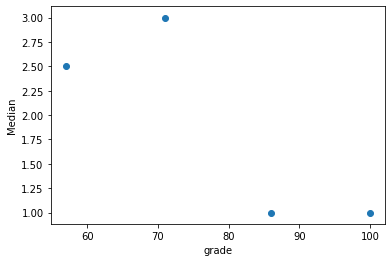

In [46]:
plt.scatter(groups,Medians)
plt.xlabel("grade")
plt.ylabel("Median Total number of posts")
plt.show()

Looks like High achievers, arent active in the forum!

Lets examine that with writing and responding as well:

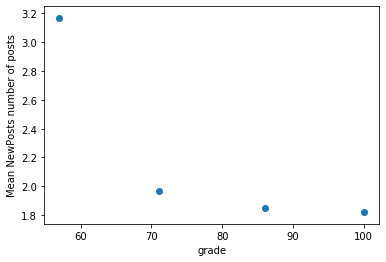

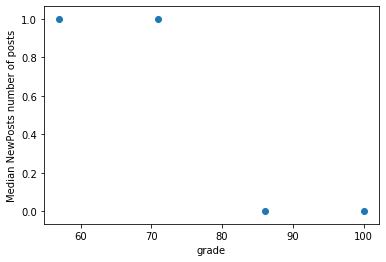

In [48]:
Means=np.array([np.mean(StudentsStatus.loc[StudentsStatus["id"].isin(Grade4),"NewPosts"]),np.mean(StudentsStatus.loc[StudentsStatus["id"].isin(Grade5),"NewPosts"]),np.mean(StudentsStatus.loc[StudentsStatus["id"].isin(Grade6),"NewPosts"]),np.mean(StudentsStatus.loc[StudentsStatus["id"].isin(Grade7),"NewPosts"])])
Medians=np.array([np.median(StudentsStatus.loc[StudentsStatus["id"].isin(Grade4),"NewPosts"]),np.median(StudentsStatus.loc[StudentsStatus["id"].isin(Grade5),"NewPosts"]),np.median(StudentsStatus.loc[StudentsStatus["id"].isin(Grade6),"NewPosts"]),np.median(StudentsStatus.loc[StudentsStatus["id"].isin(Grade7),"NewPosts"])])
groups=np.array([57,71,86,100])
plt.scatter(groups,Means)
plt.xlabel("grade")
plt.ylabel("Mean NewPosts number of posts")
plt.show()
plt.scatter(groups,Medians)
plt.xlabel("grade")
plt.ylabel("Median NewPosts number of posts")
plt.show()

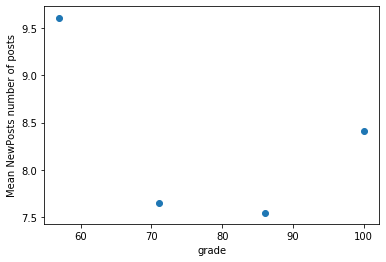

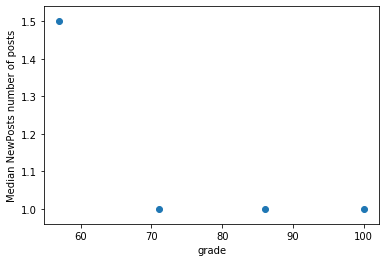

In [49]:
Means=np.array([np.mean(StudentsStatus.loc[StudentsStatus["id"].isin(Grade4),"Comments"]),np.mean(StudentsStatus.loc[StudentsStatus["id"].isin(Grade5),"Comments"]),np.mean(StudentsStatus.loc[StudentsStatus["id"].isin(Grade6),"Comments"]),np.mean(StudentsStatus.loc[StudentsStatus["id"].isin(Grade7),"Comments"])])
Medians=np.array([np.median(StudentsStatus.loc[StudentsStatus["id"].isin(Grade4),"Comments"]),np.median(StudentsStatus.loc[StudentsStatus["id"].isin(Grade5),"Comments"]),np.median(StudentsStatus.loc[StudentsStatus["id"].isin(Grade6),"Comments"]),np.median(StudentsStatus.loc[StudentsStatus["id"].isin(Grade7),"Comments"])])
groups=np.array([57,71,86,100])
plt.scatter(groups,Means)
plt.xlabel("grade")
plt.ylabel("Mean NewPosts number of posts")
plt.show()
plt.scatter(groups,Medians)
plt.xlabel("grade")
plt.ylabel("Median NewPosts number of posts")
plt.show()

Same Behaviour!

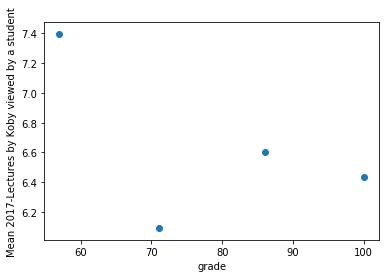

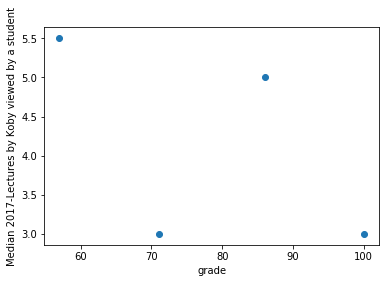

In [55]:
Means=np.array([np.mean(CountedActivity.loc[CountedActivity["id"].isin(Grade4),"KobiViews"]),np.mean(CountedActivity.loc[CountedActivity["id"].isin(Grade5),"KobiViews"]),np.mean(CountedActivity.loc[CountedActivity["id"].isin(Grade6),"KobiViews"]),np.mean(CountedActivity.loc[CountedActivity["id"].isin(Grade7),"KobiViews"])])
Medians=np.array([np.median(CountedActivity.loc[CountedActivity["id"].isin(Grade4),"KobiViews"]),np.median(CountedActivity.loc[CountedActivity["id"].isin(Grade5),"KobiViews"]),np.median(CountedActivity.loc[CountedActivity["id"].isin(Grade6),"KobiViews"]),np.median(CountedActivity.loc[CountedActivity["id"].isin(Grade7),"KobiViews"])])
groups=np.array([57,71,86,100])
plt.scatter(groups,Means)
plt.xlabel("grade")
plt.ylabel("Mean 2017-Lectures by Koby viewed by a student")
plt.show()
plt.scatter(groups,Medians)
plt.xlabel("grade")
plt.ylabel("Median 2017-Lectures by Koby viewed by a student")
plt.show()

No clear pattern!

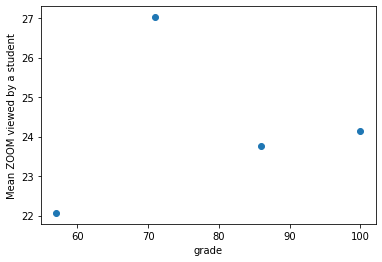

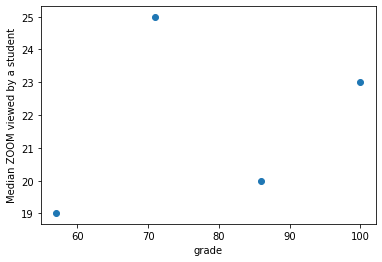

In [56]:
Means=np.array([np.mean(CountedActivity.loc[CountedActivity["id"].isin(Grade4),"ZoomViews"]),np.mean(CountedActivity.loc[CountedActivity["id"].isin(Grade5),"ZoomViews"]),np.mean(CountedActivity.loc[CountedActivity["id"].isin(Grade6),"ZoomViews"]),np.mean(CountedActivity.loc[CountedActivity["id"].isin(Grade7),"ZoomViews"])])
Medians=np.array([np.median(CountedActivity.loc[CountedActivity["id"].isin(Grade4),"ZoomViews"]),np.median(CountedActivity.loc[CountedActivity["id"].isin(Grade5),"ZoomViews"]),np.median(CountedActivity.loc[CountedActivity["id"].isin(Grade6),"ZoomViews"]),np.median(CountedActivity.loc[CountedActivity["id"].isin(Grade7),"ZoomViews"])])
groups=np.array([57,71,86,100])
plt.scatter(groups,Means)
plt.xlabel("grade")
plt.ylabel("Mean ZOOM viewed by a student")
plt.show()
plt.scatter(groups,Medians)
plt.xlabel("grade")
plt.ylabel("Median ZOOM viewed by a student")
plt.show()

Some Linear Pattern

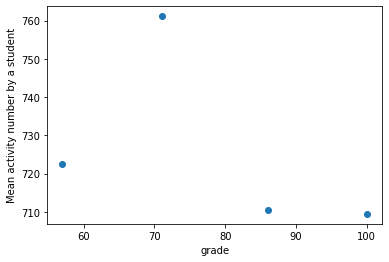

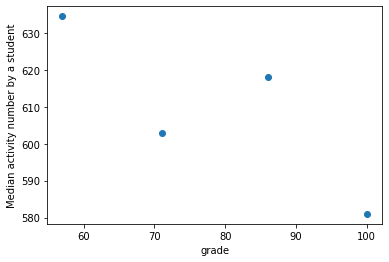

In [57]:
Means=np.array([np.mean(CountedActivity.loc[CountedActivity["id"].isin(Grade4),"AllRows"]),np.mean(CountedActivity.loc[CountedActivity["id"].isin(Grade5),"AllRows"]),np.mean(CountedActivity.loc[CountedActivity["id"].isin(Grade6),"AllRows"]),np.mean(CountedActivity.loc[CountedActivity["id"].isin(Grade7),"AllRows"])])
Medians=np.array([np.median(CountedActivity.loc[CountedActivity["id"].isin(Grade4),"AllRows"]),np.median(CountedActivity.loc[CountedActivity["id"].isin(Grade5),"AllRows"]),np.median(CountedActivity.loc[CountedActivity["id"].isin(Grade6),"AllRows"]),np.median(CountedActivity.loc[CountedActivity["id"].isin(Grade7),"AllRows"])])
groups=np.array([57,71,86,100])
plt.scatter(groups,Means)
plt.xlabel("grade")
plt.ylabel("Mean activity number by a student")
plt.show()
plt.scatter(groups,Medians)
plt.xlabel("grade")
plt.ylabel("Median activity number by a student")
plt.show()

Badges:

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

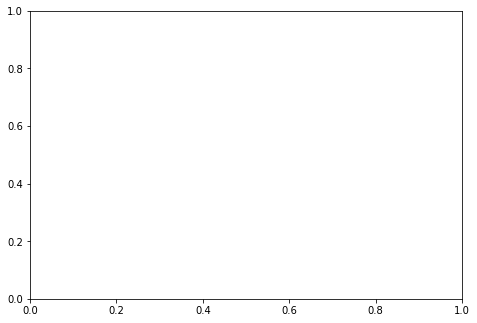

In [66]:
grades2=grades.set_index("ID")
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(["Control Group", "Badge Group"], [np.mean(grades2.loc[ControlGroup.id,"grade"]), np.mean(grades2.loc[BadgeGroup.id,"grade"])])

In [71]:
grades2.loc[ControlGroup.id.values,"grade"]

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

array([203614060, 316509397, 201095569, 205947310,  34439810, 312204811,
       204687727, 312213978, 204649941, 204434294, 316614726, 201278397,
       206416380, 206259848, 308547090, 205635246, 203956966, 201659190,
       206549784, 315934281, 206335218, 204459952, 316157379, 317283299,
       205566292, 302390778, 206108367, 316607258, 206065989, 315450569,
       205865835, 313304578, 314704016, 206986762, 315923151, 316294032,
       206013310, 208858324, 313560468, 316221811, 318457645, 313191645,
       316048628, 208654608, 206728552, 320569650, 208383174, 316399401,
       316593557, 313245508, 321747388, 208082768, 316424365, 207597063,
       208308304, 207042326, 314047101, 318364122, 313434615, 208785246,
       206934978, 206103715, 316535723, 212080188, 311275879, 203398029,
       208987248, 313326985, 205912975, 315542951, 209469717, 316586908,
       312470396, 206795320, 205623580, 206085540, 315844068, 322597717,
       312804446, 322866070, 322826975, 212072201, 

Not sure- maybe the more seriuos you are the less you stroll around and just work.

If I were to continue this analysis:
Badge and control group
instead of 4 groups: only 2
analysis of text in forum- most dominant 20 words